# Importing libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df= pd.read_csv(r"C:\Users\MINE\Desktop\time series analysis\Time Series Analysis\Introduction to Time Series Forecasting\bitcoin_price.csv")

In [53]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3392 non-null   object 
 1   Open       3392 non-null   float64
 2   High       3392 non-null   float64
 3   Low        3392 non-null   float64
 4   Close      3392 non-null   float64
 5   Adj Close  3392 non-null   float64
 6   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 185.6+ KB


# Setting time series index

In [55]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [56]:
df['Date']= pd.to_datetime(df['Date'])

In [57]:
# Extracting day month and year before setting as index
df['Day']= df['Date'].dt.day
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year
df['Day_name']= df['Date'].dt.day_name()
df['Month_name']= df.Date.dt.month_name()

In [58]:
df.set_index('Date', inplace=True)

In [59]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Day_name,Month_name
Date,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17,9,2014,Wednesday,September
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18,9,2014,Thursday,September
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19,9,2014,Friday,September
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20,9,2014,Saturday,September
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21,9,2014,Sunday,September


In [60]:
#  Select the bitcoin data for November 2021
df.loc['2021-11']

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Day_name,Month_name
Date,,,,,,,,,,,
2021-11-01,61320.449219,62419.003906,59695.183594,61004.406250,61004.406250,36150572843,1,11,2021,Monday,November
2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,63226.402344,37746665647,2,11,2021,Tuesday,November
2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,36124731509,3,11,2021,Wednesday,November
2021-11-04,62941.804688,63123.289062,60799.664062,61452.230469,61452.230469,32615846901,4,11,2021,Thursday,November
2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,30605102446,5,11,2021,Friday,November
2021-11-06,61068.875000,61590.683594,60163.781250,61527.480469,61527.480469,29094934221,6,11,2021,Saturday,November
2021-11-07,61554.921875,63326.988281,61432.488281,63326.988281,63326.988281,24726754302,7,11,2021,Sunday,November
2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,67566.828125,41125608330,8,11,2021,Monday,November
2021-11-09,67549.734375,68530.335938,66382.062500,66971.828125,66971.828125,42357991721,9,11,2021,Tuesday,November


In [61]:
df= df.drop(columns=['Day_name', 'Month_name'])

In [62]:
# Resampling to monthly frequency and calculate the mean cost price
df.resample('ME').mean()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
Date,,,,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07,23.5,9.0,2014.0
2014-10-31,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07,16.0,10.0,2014.0
2014-11-30,364.850235,376.494235,357.241831,366.099799,366.099799,2.199111e+07,15.5,11.0,2014.0
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07,16.0,12.0,2014.0
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07,16.0,1.0,2015.0
...,...,...,...,...,...,...,...,...,...
2023-08-31,27959.756615,28204.527722,27517.854587,27852.792843,27852.792843,1.412013e+10,16.0,8.0,2023.0
2023-09-30,26271.268229,26573.941862,26041.182292,26306.136393,26306.136393,1.125458e+10,15.5,9.0,2023.0
2023-10-31,29511.811114,30155.900454,29235.543977,29755.895161,29755.895161,1.536857e+10,16.0,10.0,2023.0


In [66]:
df.resample('W').mean()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
Date,,,,,,,,,
2014-09-21,429.916998,437.718195,406.624402,416.859003,416.859003,3.138068e+07,19.000000,9.000000,2014.0
2014-09-28,410.650718,418.668993,399.377141,407.692566,407.692566,2.668180e+07,25.000000,9.000000,2014.0
2014-10-05,369.774288,376.721000,353.207140,361.426570,361.426570,3.952256e+07,10.571429,9.714286,2014.0
2014-10-12,346.927429,363.308864,337.567858,355.234580,355.234580,4.873611e+07,9.000000,10.000000,2014.0
2014-10-19,389.010284,397.790427,380.410575,390.479854,390.479854,2.241458e+07,16.000000,10.000000,2014.0
...,...,...,...,...,...,...,...,...,...
2023-12-03,38038.414062,38743.479353,37766.444196,38399.994978,38399.994978,1.919430e+10,17.142857,11.428571,2023.0
2023-12-10,43002.227121,44027.167411,42586.383929,43538.877232,43538.877232,2.692909e+10,7.000000,12.000000,2023.0
2023-12-17,42369.368862,42969.940848,41148.103237,42020.472656,42020.472656,2.407050e+10,14.000000,12.000000,2023.0


# Exploratory Data Analysis

<Axes: xlabel='Date'>

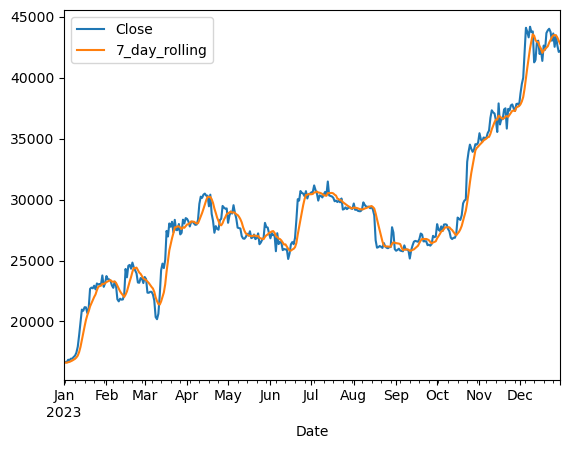

In [67]:
# 7 day rolling average of the closing price
df['7_day_rolling']=df['Close'].rolling(window=7).mean()
df[['Close', '7_day_rolling']].loc['2023'].plot()

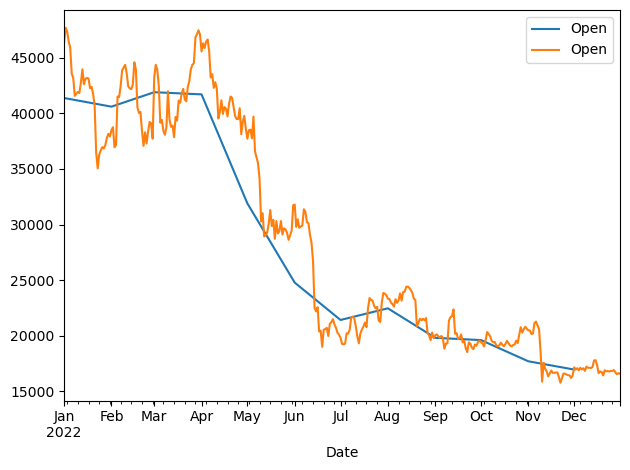

In [68]:
df.loc['2022'].Open.resample("ME").mean().plot()
df.loc['2022'].Open.plot()
plt.legend()
plt.tight_layout()
plt.show()


In [69]:
df.Open.resample("ME").mean().isnull().sum()

0

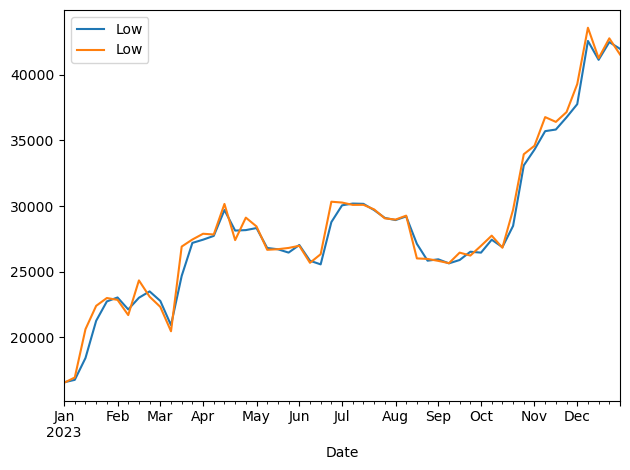

In [70]:
low_resample =df.Low.resample('W').mean()
low_resample.loc['2023'].plot()
df.Low.loc['2023'].plot()
plt.legend()
plt.tight_layout()
plt.show()

In [71]:
df.resample('YE').mean()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,7_day_rolling
Date,,,,,,,,,,
2014-12-31,365.058217,373.265397,355.903726,363.693085,363.693085,2.383690e+07,16.849057,10.735849,2014.0,363.359264
2015-12-31,272.149011,278.151978,266.807891,272.453381,272.453381,3.390557e+07,15.720548,6.526027,2015.0,271.537020
2016-12-31,567.141429,574.302273,560.453374,568.492407,568.492407,8.592451e+07,15.756831,6.513661,2016.0,564.118397
2017-12-31,3970.644848,4144.687445,3811.707792,4006.033629,4006.033629,2.382867e+09,15.720548,6.526027,2017.0,3896.547876
2018-12-31,7601.018680,7787.978969,7350.747939,7572.298947,7572.298947,6.063552e+09,15.720548,6.526027,2018.0,7658.371034
2019-12-31,7385.218456,7549.907409,7222.602867,7395.246282,7395.246282,1.673049e+10,15.720548,6.526027,2019.0,7366.641986
2020-12-31,11056.787201,11304.359035,10844.595163,11116.378092,11116.378092,3.302327e+10,15.756831,6.513661,2020.0,10946.662793
2021-12-31,47402.115662,48762.998924,45852.003082,47436.932021,47436.932021,4.715574e+10,15.720548,6.526027,2021.0,47277.846241
2022-12-31,28278.690293,28817.806389,27617.101102,28197.754099,28197.754099,3.001327e+10,15.720548,6.526027,2022.0,28450.390465


In [72]:
# Find out the highest average month
df.resample("ME").mean()['Close'].max()

60621.48880208333

In [73]:
# Calculate daily returns
df['Daily_returns']=df["Close"].pct_change()*100

In [74]:
# Dayw with more than 10% change in closing price
df[abs(df['Daily_returns'] > 10)].head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,7_day_rolling,Daily_returns
Date,,,,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,12,11,2014,365.519579,15.193570
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,15,1,2015,244.638280,17.821709
2015-11-02,325.941986,365.359985,323.209015,361.188995,361.188995,101918000,2,11,2015,320.151716,10.987889
2015-11-03,361.872986,417.899994,357.647003,403.416992,403.416992,206162000,3,11,2015,335.813001,11.691385
2016-01-20,379.739990,425.266998,376.598999,420.230011,420.230011,121720000,20,1,2016,393.145573,10.543504


# Data Visualization

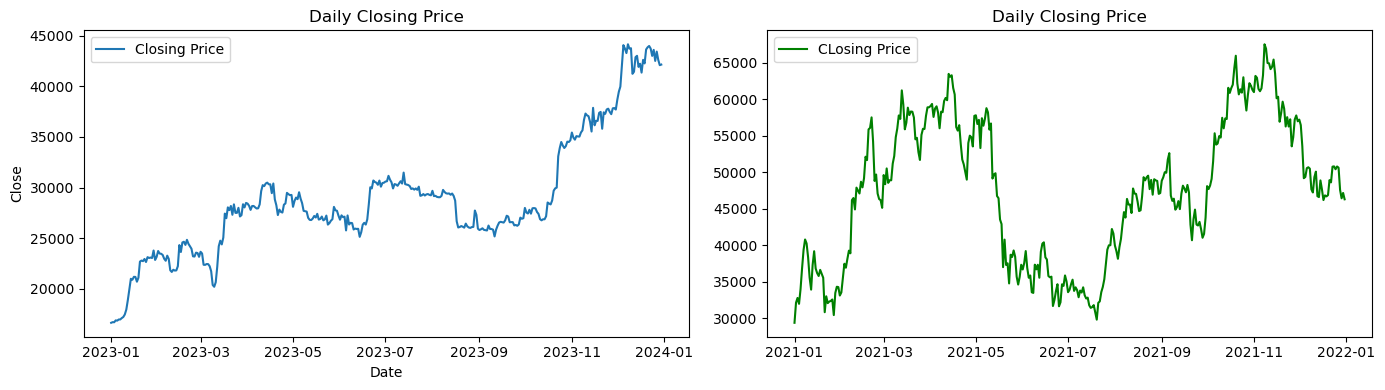

In [75]:
# Daily closing price plot
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
sns.lineplot(data=df["Close"].loc['2023'],legend='auto', label= 'Closing Price' )
plt.title('Daily Closing Price')


plt.subplot(1,2,2)
plt.plot(df["Close"].loc['2021'], color= 'Green',label= 'CLosing Price' )

plt.title('Daily Closing Price')

plt.legend()
plt.tight_layout()
plt.show()

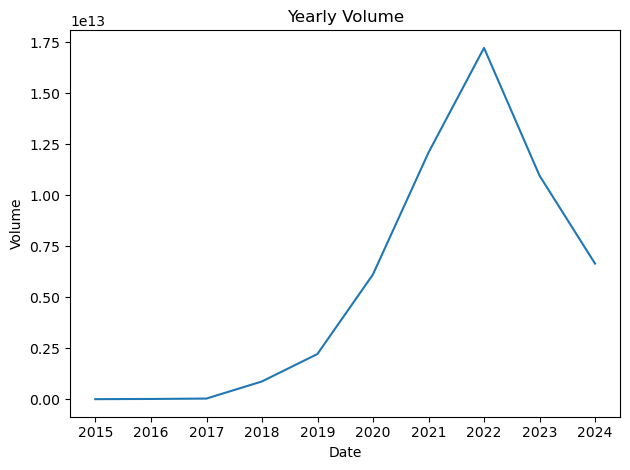

In [76]:
# plotting the yearly volume
sns.lineplot(df.Volume.resample('YE').sum())

plt.title('Yearly Volume')
plt.tight_layout()
plt.show()


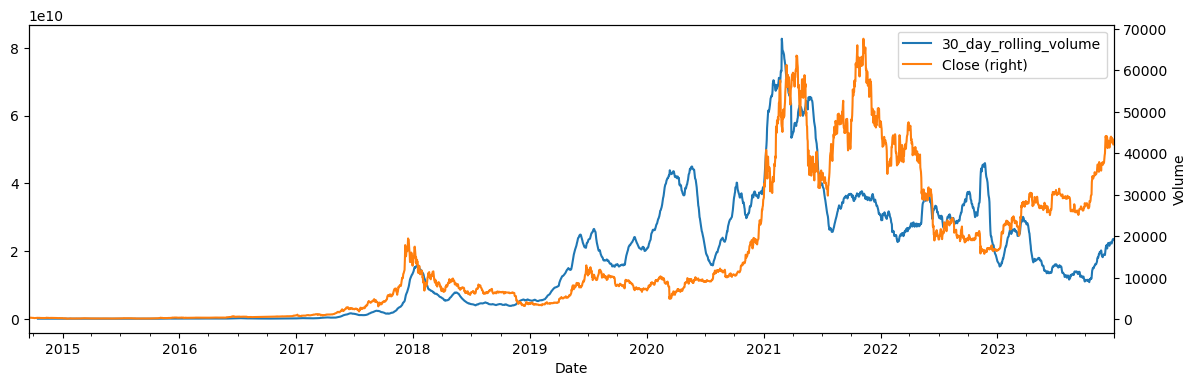

In [77]:
# Plot closing price and 30 day rolling volume
plt.figure(figsize=(14, 4))
df['30_day_rolling_volume']= df.Volume.rolling(window=30).mean()
df['30_day_rolling_volume'].plot(legend=True)
df.Close.plot(secondary_y= True, legend= True).set_ylabel('Volume')

plt.show()

In [78]:
# Correlation between 30 day rolling volume and closing price
df.Close.corr(df['30_day_rolling_volume'])

0.7504453796186054

# Data Manipulation

In [32]:
# identify missing values
df.isnull().sum()

# Fill missing values

df['30_day_rolling_volume'].fillna(method= 'bfill', inplace=True)

C:\Users\MINE\AppData\Local\Temp\ipykernel_9252\2333590912.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['30_day_rolling_volume'].fillna(method= 'bfill', inplace=True)


In [33]:
df.isnull().sum()

Open                     0
High                     0
Low                      0
Close                    0
Adj Close                0
Volume                   0
Day                      0
Month                    0
Year                     0
7_day_rolling            6
Daily_returns            1
30_day_rolling_volume    0
dtype: int64

In [34]:
# Extract time variables

df['year']= df.index.year
df['month']= df.index.month
df['day']= df.index.day
df['week_day']= df.index.day_name()
df['is_weekend']= df.index.weekday>4
df.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,7_day_rolling,Daily_returns,30_day_rolling_volume,year,month,day,week_day,is_weekend
Date,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17,9,2014,NaN,NaN,3.624856e+07,2014,9,17,Wednesday,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18,9,2014,NaN,-7.192558,3.624856e+07,2014,9,18,Thursday,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19,9,2014,NaN,-6.984265,3.624856e+07,2014,9,19,Friday,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20,9,2014,NaN,3.573492,3.624856e+07,2014,9,20,Saturday,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21,9,2014,NaN,-2.465854,3.624856e+07,2014,9,21,Sunday,True


# Seasonal Decomposition

In [35]:
# Trend: the general direction of the time series

# Seasonality is the seasonal cycles e/g a time series that is higher in summer and lower in winter

# Error is what is not explained by the trend and seasonality


In [36]:
# Python seasonal plots
from statsmodels.graphics.tsaplots import month_plot, quarter_plot


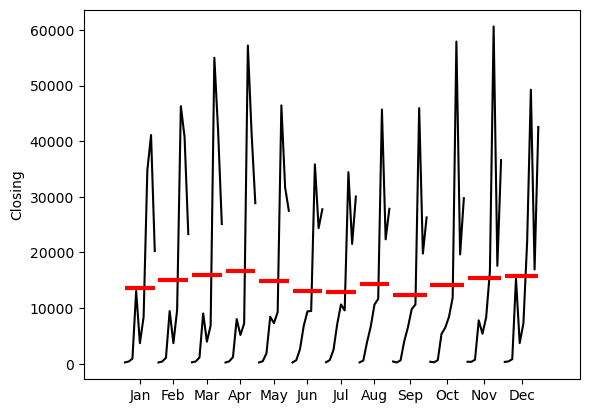

In [37]:
# Plotting the monthly seasonality

month_plot(df['Close'].resample('ME').mean(), ylabel='Closing')
plt.show()


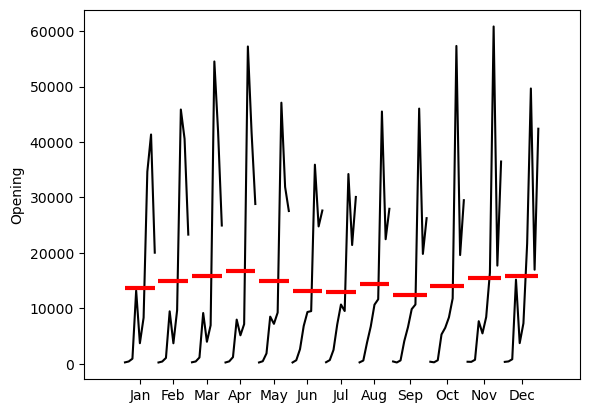

In [38]:

month_plot(df['Open'].resample('ME').mean(), ylabel='Opening')
plt.show()

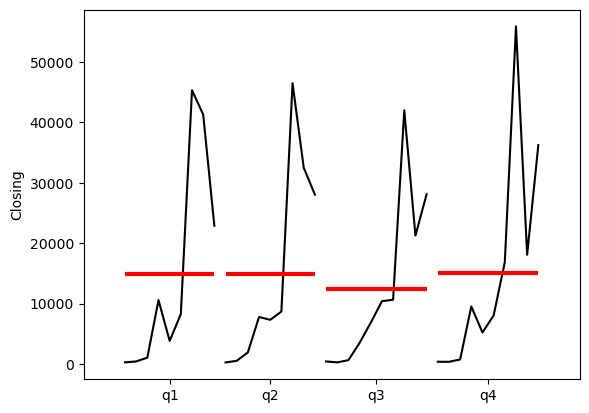

In [39]:
quarter_plot(df['Close'].resample('QE').mean(), ylabel='Closing')
plt.show()

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1500x500 with 0 Axes>

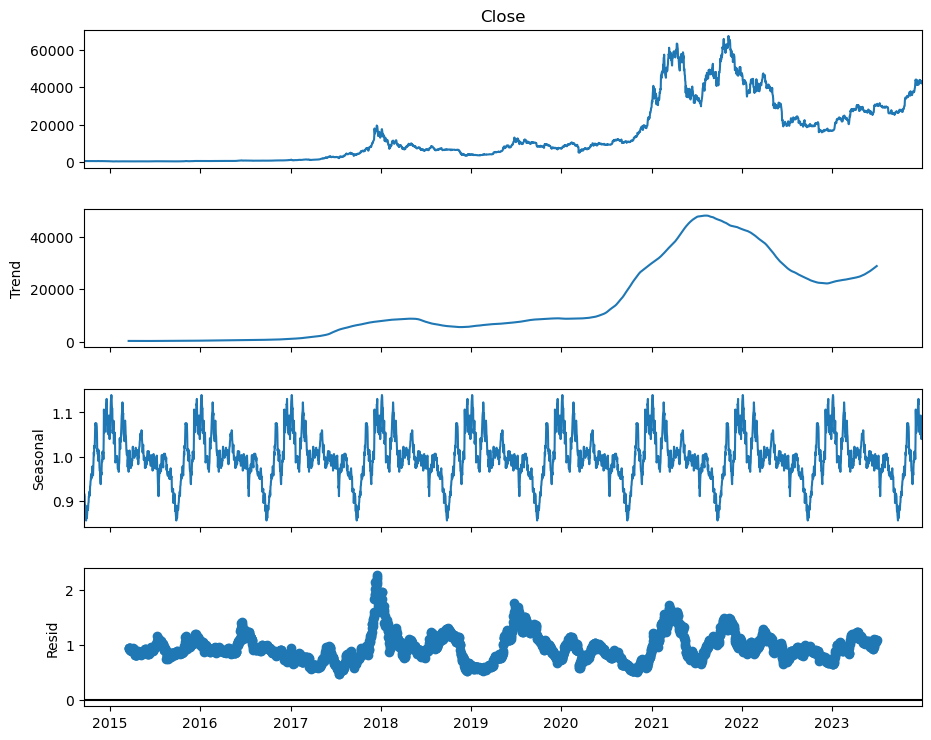

In [41]:
# Seasonal decomposition plots for bitcoin data 
decomposition= seasonal_decompose(df['Close'], model= 'mul', period= 365)
plt.figure(figsize=(15,5))
decomposition.plot().set_size_inches(10,8)
plt.show()

In [42]:
High_decompose= seasonal_decompose(df['High'], model= 'additive', period= 365)

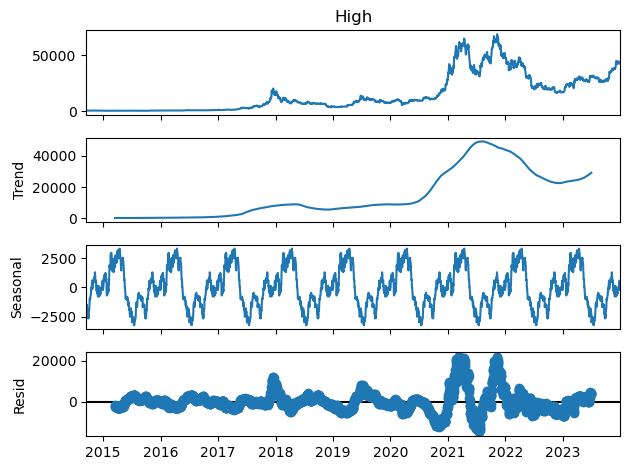

In [43]:
High_decompose.plot()
plt.show()

# Auto Correlation

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, acf

In [45]:
acf(df['Close'])

array([1.        , 0.99829415, 0.99665087, 0.9949653 , 0.99320889,
       0.99140696, 0.98953664, 0.98764093, 0.98582467, 0.98408263,
       0.98215467, 0.98018549, 0.97825574, 0.97644174, 0.97460532,
       0.97275897, 0.97094158, 0.96915357, 0.96733447, 0.96555793,
       0.96388439, 0.96199817, 0.96018342, 0.95831698, 0.95656998,
       0.95464775, 0.95271995, 0.95079776, 0.94883317, 0.94676909,
       0.94483879, 0.94289067, 0.94081221, 0.93890882, 0.93680147,
       0.93466336])

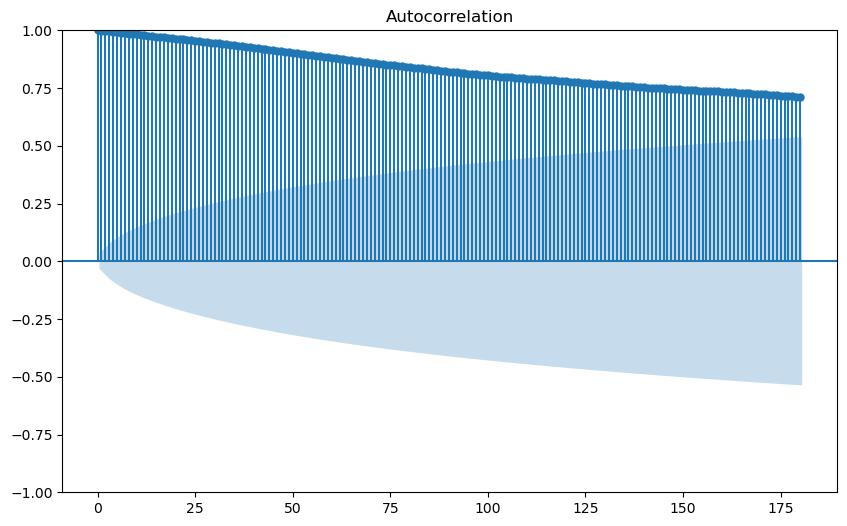

In [46]:
# Plotting the auto correlation

fig, ax= plt.subplots(figsize=(10,6))
plot_acf(df['Close'], lags = 180, ax=ax)
plt.show()

# Partial autocorrelation

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf

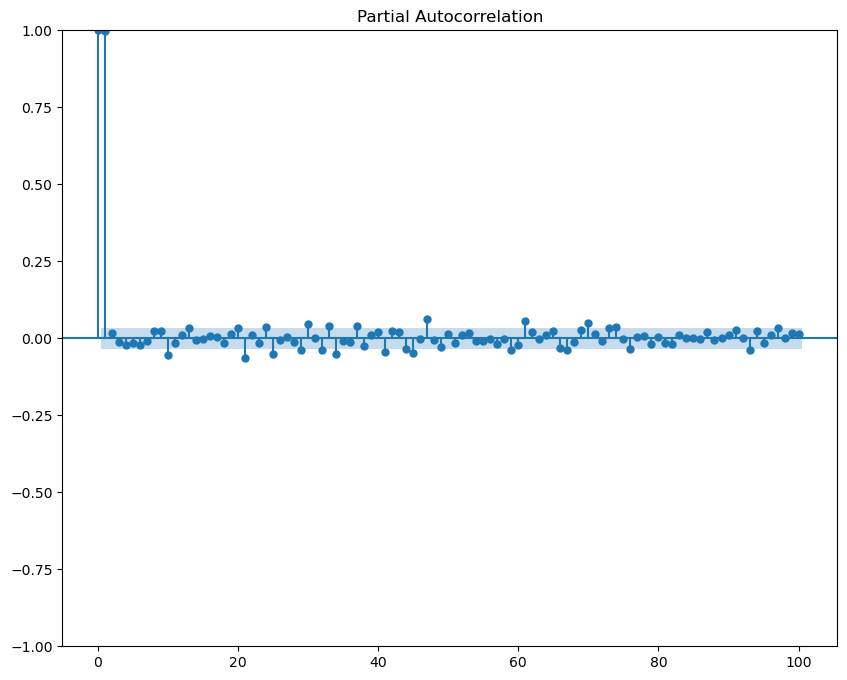

In [48]:
fig, ax=plt.subplots(figsize=(10,8))
plot_pacf(df['Close'], lags= 100, ax=ax)
plt.show()